# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:16:49.507593: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:16:52.416205
2025-04-14 23:16:52.416205


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 6
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:16:47"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

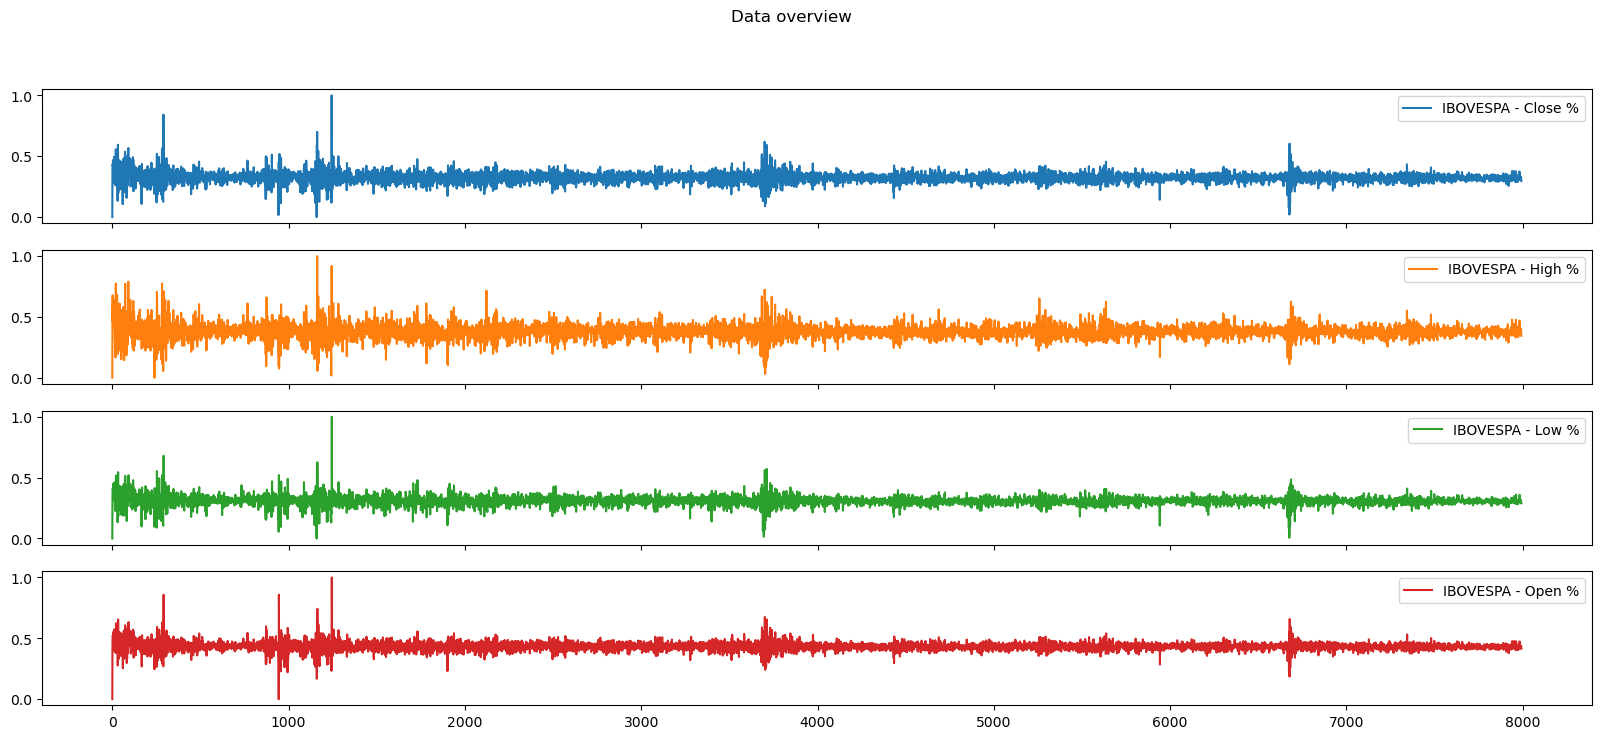

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

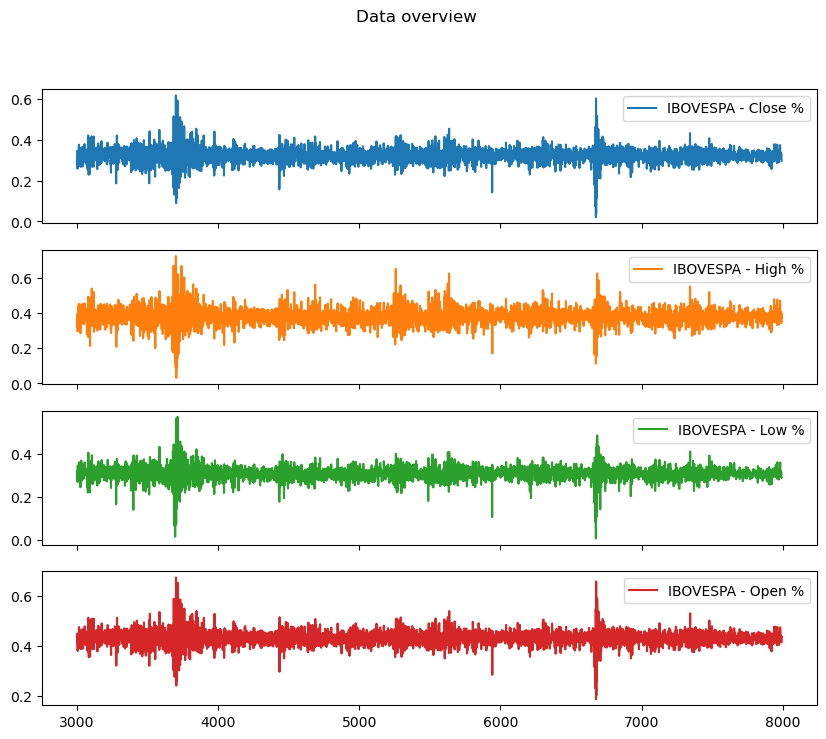

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

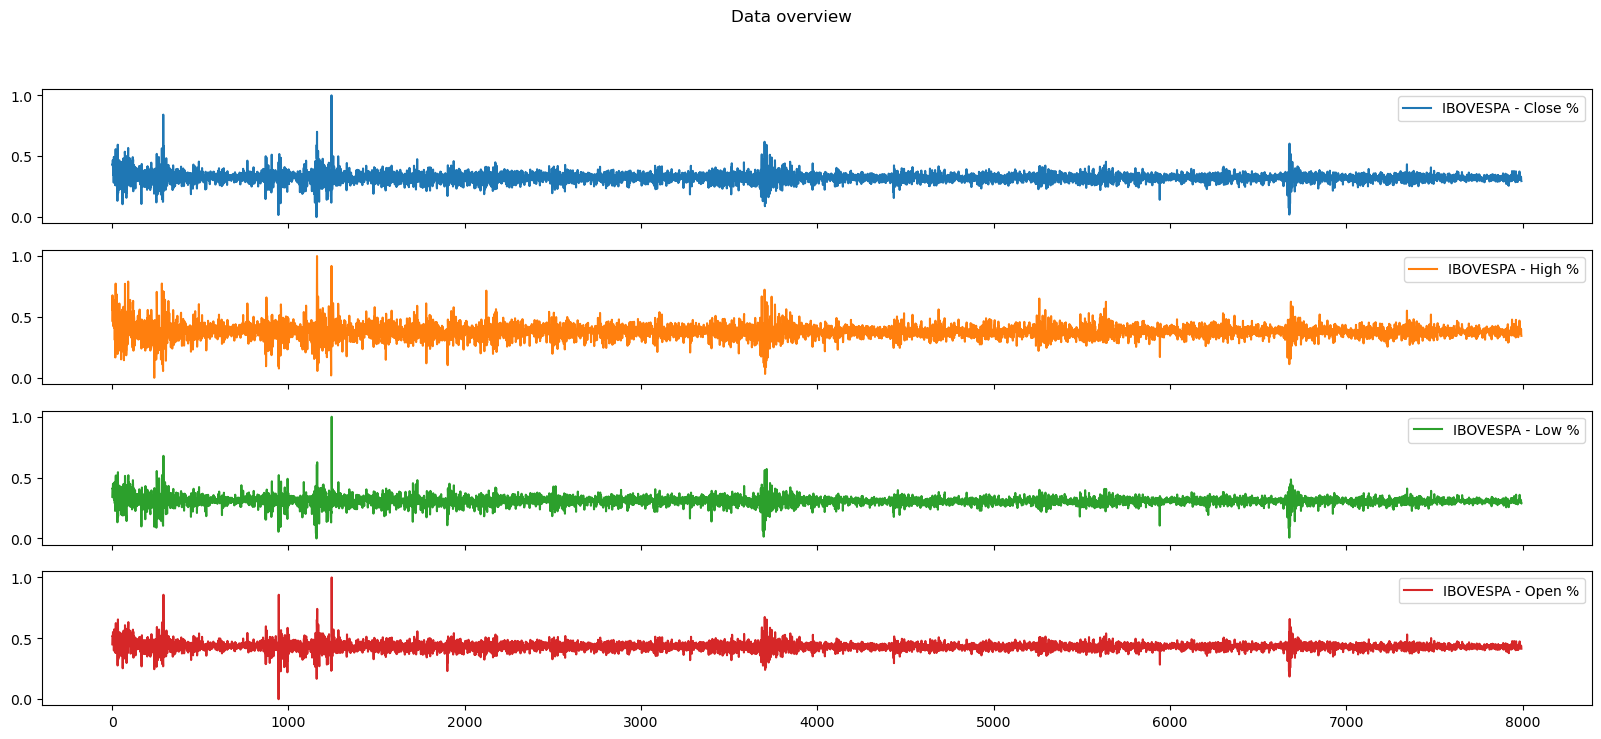

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

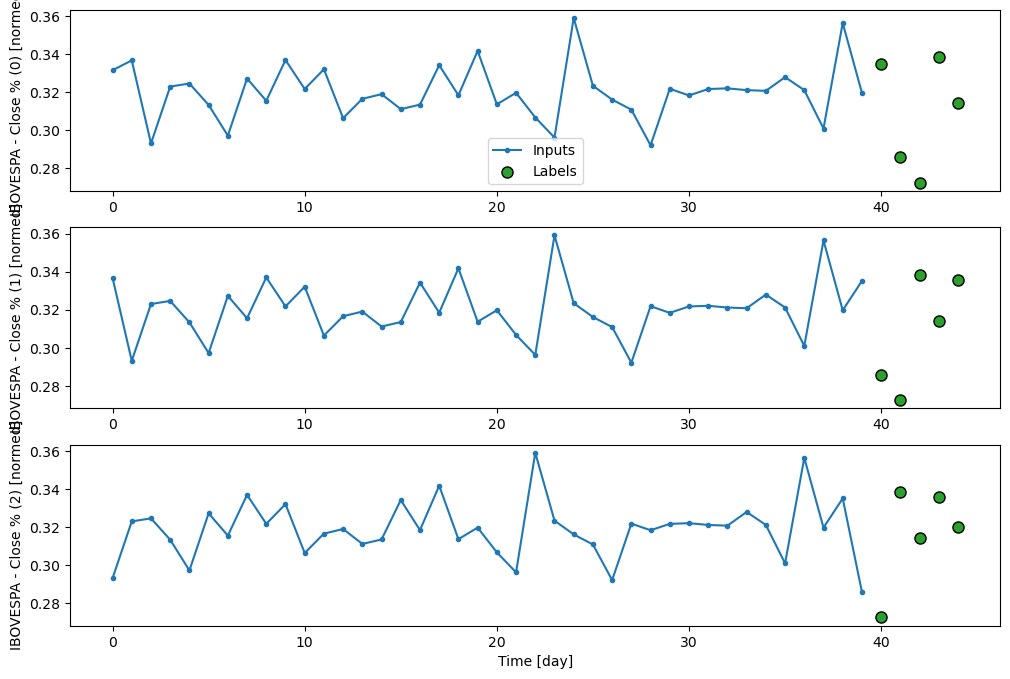

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14:25 4s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 89.1718 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3324  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 91.5708 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3396

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 88.8514 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3314

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 85.3455 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.3218

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 82.7086 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.3133

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 80.1879 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.3049

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 77.4191 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2965

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 74.9197 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2886

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 72.5934 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2813

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 70.3082 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2743

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 68.1710 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2678

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 66.1672 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2617

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 64.3112 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2561

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 62.7080 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2508

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 61.3128 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2460

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 59.9772 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2414

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 7477.3945 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2371

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 20536.2871 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2332

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 31592.1270 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2295

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 41000.3984 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2261

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 49042.0625 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2228

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 55941.5664 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2197

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 61879.9258 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2167

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 67004.4297 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2138

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 71435.8750 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2110

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 75274.0703 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2084

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 78602.0391 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2059

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 81489.2891 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2034

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 83994.3125 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2011

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 86166.6484 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1988

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 88048.4141 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1967

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 89675.6016 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1946

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 91079.1172 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1926

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 92285.5859 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1906

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 93318.0391 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1887

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 94196.4609 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1869

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 94938.2734 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1851

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 95558.6953 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1834

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 96071.0625 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1817

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 96487.0859 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1801

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 96817.1016 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1786

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 97070.2266 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1770

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 97254.5312 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1756

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 97377.1875 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1741

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 97444.5703 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1727

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 97462.3438 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1713

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 97435.5938 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1700

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 97368.8359 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1687

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 97266.1406 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1675

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 97131.1406 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1662

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 96967.1250 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1650

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 96777.0234 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1638

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 96563.5000 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 96328.9375 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1616

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 96075.5156 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1605

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 95805.1797 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1594

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 95519.7109 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1584

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 95220.7031 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1574

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 94909.6250 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1564

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 94587.7812 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1554

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 94256.3750 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1545

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 93916.5078 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1536

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 93569.1641 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1527

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 93215.2500 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1518

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 92855.5938 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1509

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 92490.9453 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1501

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 92121.9844 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1492

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 91749.3438 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1484

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 91373.5938 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1476

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 90995.2500 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1468

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 90614.7891 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1460

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 90232.6406 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1453

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 89849.2188 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1445

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 89464.8672 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1438

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 89079.9219 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1431

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 88694.6875 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1424

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 88309.4375 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1417

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 87924.4297 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1410

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 87539.8828 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1403

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 87156.0156 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1396

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 86773.0156 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1390

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 86391.0547 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1383

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 86010.3047 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1377

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 85630.8906 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1371

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 85252.9453 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1364

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 84876.6016 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1358

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 84501.9531 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1352

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 84129.1094 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1346

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 83758.1406 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1341

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 83389.1406 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1335

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 83022.1719 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1329

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 82657.3047 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1324

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 82294.5938 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1318

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 81934.0781 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1313

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 81575.8203 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1307

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 81219.8438 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1302

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 80866.1953 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1297

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 80514.8984 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1292

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 80165.9766 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1287

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 79819.4531 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1282

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 79475.3438 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1277

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 79133.6641 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1272

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 78794.4375 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1267

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 78457.6562 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1262

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 78123.3438 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1258

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 77791.4844 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1253

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 77462.0938 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1249

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 77135.1719 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1244

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 76810.7031 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1240

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 76488.6953 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1236

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 76169.1406 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1231

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 75852.0312 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1227

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 75537.3594 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1223

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 75225.1172 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1219

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 74915.2969 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1215

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 74607.8828 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1210

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 74302.8594 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1206

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 73851.5703 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1201 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 4.2245 - val_mean_squared_error: 2.9791e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 28.3043 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 26.1872 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1015 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.3475 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 23.4436 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 23.7047 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.4794 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.0225 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.4955 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9388 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.3925 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8523 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.3304 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.8467 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.4343 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.1592 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.9909 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0767

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8217 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 8706.4072 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 24000.4453 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 36948.7109 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 47967.5078 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 57385.8672 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 65466.6250 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 72421.7812 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 78423.8125 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 83614.1875 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 88109.7812 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 92007.8359 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 95389.7422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 98324.0156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 100868.6562 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 103072.9844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 104979.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 106623.3984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 108036.8359 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 109246.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 110275.7109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 111144.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 111872.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 112472.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 112960.1953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 113347.1250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 113644.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 113860.2656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 114004.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 114083.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 114104.8438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 114073.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 113996.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 113876.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 113718.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 113526.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 113304.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 113054.6953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 112780.3281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 112483.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 112167.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111833.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111483.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111119.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110743.0234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110355.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109957.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109550.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109136.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108715.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108288.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107857.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107420.9531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106981.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106538.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106092.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105645.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105196.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104746.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104296.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103845.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103394.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102943.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102493.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102044.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101595.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101148.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100702.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100258.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99816.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99375.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98937.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98500.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98066.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97634.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97204.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96777.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96353.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95931.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95511.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95094.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94680.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94269.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93861.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93455.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93052.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92652.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92255.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91861.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91469.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91275.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90888.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90503.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90122.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89744.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89368.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88995.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88626.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88259.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87895.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87533.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87175.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86819.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86468.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9182 - val_mean_squared_error: 2.5439e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3742 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 25.9881 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.1961 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0933

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.4242 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.7542 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.5589 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.3527 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.8709 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.3322 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0859

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.7756 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 21.2384 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.7035 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 20.2024 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.9640 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5519 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.2743 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 19.1036 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.9329 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 8759.5176 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 24146.8633 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 37174.1250 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0735

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 48260.1445 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 57735.9609 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 65866.0234 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 72863.6094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 78902.2578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 84124.2969 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 88647.3203 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 92569.1641 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 95971.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 98923.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 100249.6641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 102632.9141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 104695.8125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 105619.6328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 107273.8828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 108695.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 109912.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 110948.4844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 111823.0234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 112554.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 113158.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 113649.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 114038.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 114337.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 114554.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 114699.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 114779.6328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 114800.9688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 114769.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 114691.5469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 114570.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 114412.2109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 114219.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 113995.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 113744.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 113468.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 113170.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 112851.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 112685.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 112341.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111982.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111609.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111224.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110829.4844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110424.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110011.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109591.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109164.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108732.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108296.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107855.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107411.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106964.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106515.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106064.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105612.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105159.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104705.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104251.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103798.3438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103345.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102892.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102440.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101990.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101541.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101093.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100647.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100203.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99761.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99320.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98882.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98447.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98013.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97582.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97154.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96728.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96304.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95884.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95466.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95051.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94638.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94229.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93822.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93418.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93017.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92818.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92619.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92421.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92224.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91831.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91442.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91055.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90672.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90291.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89913.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89538.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89166.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88797.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88431.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88067.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87706.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87349.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86996.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 4.1037 - val_mean_squared_error: 2.8047e-04 - val_root_mean_squared_error: 0.0167 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 28.3237 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1010

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 26.0442 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 24.1528 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0946

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 23.2008 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.4247 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.1835 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.7147 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.1832 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.6258 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0824 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0834

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5464 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0311 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5513 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.1457 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.8811 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7243 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.5643 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 8502.8701 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 23439.0449 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 36084.3359 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 46845.3047 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 56043.2852 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 63934.9648 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 70727.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 76588.9688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 81657.8906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 86048.2969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 89855.1484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 93157.9141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 96023.5312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 98508.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 100661.3828 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 102522.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 104128.7188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 105509.0859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 106690.4141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 107695.5703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 108544.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 109254.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 109840.9766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 110317.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 110695.1172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 110985.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 111196.2422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 111336.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 111414.3828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111435.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111404.8672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111328.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111211.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111057.7344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110870.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110653.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110409.5000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110141.5469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109852.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109543.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109216.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108875.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108519.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108151.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107773.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107384.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106987.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106583.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106172.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105755.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105333.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104907.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104478.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104045.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103610.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103173.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102735.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102296.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101856.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101415.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100975.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100535.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100095.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99656.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99218.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98782.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98346.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97913.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97480.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97050.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96622.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96196.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95771.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95350.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94930.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94513.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94098.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93686.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93276.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92869.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92465.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92063.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91665.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91268.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90875.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90484.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90096.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89711.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89329.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88950.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88573.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88199.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87828.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87460.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87095.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86732.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86372.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86015.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85661.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85310.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84961.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84445.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 4.0203 - val_mean_squared_error: 2.6929e-04 - val_root_mean_squared_error: 0.0164 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 28.3359 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1009

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 26.0388 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 24.1151 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0945

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.1159 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.3108 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.0599 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.5868 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.0549 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.4968 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 20.9551 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.4221 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.9103 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.4342 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0321 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.7757 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.6286 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.4756 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 8209.6904 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 22629.8926 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 34838.3477 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 45227.5781 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 54107.8125 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 61726.8711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 68284.6328 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 73943.7344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 78837.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 83076.2812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86751.6172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 89940.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 92706.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95106.1484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97184.5312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98981.8047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100532.0859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101864.7656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103005.2812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103975.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104795.2891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105480.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106047.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106506.8047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106871.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107151.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107355.4375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107491.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107566.0312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107586.0312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107556.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107483.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107370.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107221.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107040.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106831.3125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106595.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106337.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106057.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105759.3984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105444.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105114.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104771.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104416.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104050.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103675.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103292.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102901.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102504.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102102.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101695.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101283.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100869.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100451.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100031.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99610.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604 

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99186.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98762.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98337.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97912.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97487.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97062.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96638.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96214.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95791.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95370.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94949.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94531.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94113.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93698.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93284.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92873.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92463.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92056.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91651.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91248.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90848.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90450.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90055.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89662.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89271.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88884.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88498.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88116.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87736.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87359.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86984.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86613.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86244.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85877.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85514.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85153.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84795.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84439.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84086.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83736.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83389.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83044.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82702.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82363.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82026.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81528.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9729 - val_mean_squared_error: 2.6078e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4247 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 26.0385 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 24.0911 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0939

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.0445 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0898

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.1842 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.9068 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.4220 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 21.8853 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.3268 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7858 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2535 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7431 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2689 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8679 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.6129 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4676 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.3165 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8152.2153 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22471.5137 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 34594.5469 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 44911.0742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 53729.1719 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 61294.9180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 67806.7969 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 73426.2969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 78285.8750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82494.9453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86144.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89310.9297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92058.1953 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94440.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96504.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98289.1875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99828.6172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101151.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102284.5156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103248.1641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104062.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104742.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 105304.9609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 105761.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106123.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106401.7656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106604.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 106739.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106813.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 106833.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106804.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106731.4062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106619.1406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106471.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106291.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106083.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105849.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105593.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105315.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105019.3906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104706.6641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104379.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104038.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103685.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103322.5078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102950.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102569.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102181.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101787.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101387.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100983.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100575.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100163.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99748.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605 

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99331.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98913.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98492.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98071.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97649.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97227.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96805.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96383.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95961.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95541.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95121.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94702.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94285.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93869.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93455.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93042.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92632.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92223.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91816.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91412.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91010.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90610.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90212.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89817.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89424.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89034.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88647.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88262.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87879.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87499.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87122.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86748.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86376.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86007.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85640.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85276.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84915.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84557.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84201.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83848.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83498.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83151.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82806.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82463.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82124.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81787.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81452.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 80958.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.9131 - val_mean_squared_error: 2.4869e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 28.5600 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 26.0466 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0990 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.0561 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.1937 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.9142 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.4279 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.8907 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.3312 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.7899 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.2583 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.7485 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.2752 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.8752 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6232 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4832 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3371 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8011.7886 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22083.8359 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 33997.5391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 44135.9336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 52801.7695 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 60236.8789 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66636.3125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 72158.7891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76934.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 81070.8438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84657.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87769.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90468.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92810.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 94838.4844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 96592.3672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98105.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 99405.7266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 100518.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 101465.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 102265.5000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 102934.4688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 103486.9922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 103935.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104291.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104564.8594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 104763.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 104896.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 104969.3594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 104988.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104980.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 104929.7031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 104838.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 104710.0234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104548.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104357.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104252.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104140.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104022.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 103899.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103770.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103636.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103354.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103206.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102899.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102577.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102242.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101895.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101538.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101172.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100798.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100417.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100030.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99637.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611 

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99240.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98838.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98434.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98026.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97617.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97205.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96792.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96378.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96171.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95756.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95341.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94926.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94512.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94098.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93685.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93273.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92862.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92453.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92045.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91639.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91234.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90831.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90431.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90032.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89636.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89242.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88850.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88460.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88073.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87689.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87306.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86927.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86550.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86175.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85803.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85434.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85067.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84703.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84341.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83983.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83626.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83273.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82922.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82574.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82228.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81885.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81545.7109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81208.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80873.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80540.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80210.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79883.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 79560.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9645 - val_mean_squared_error: 2.6016e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4202 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 26.0565 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 24.1075 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.0334 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1487 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0469 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.8614 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.3705 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1088 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.5554 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.2700 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 20.9923 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.4615 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.1967 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.6877 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2160 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8166 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.5644 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4252 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2808 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8075.1562 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22258.8555 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 34267.0859 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 44485.9219 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 53220.5156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 60714.6172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 67164.8359 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 72731.1250 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77544.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79703.8125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 81713.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83585.6719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86952.7656 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88465.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89874.2891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91186.5859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 92408.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93546.4844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94605.5000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95590.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97358.5859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98149.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99563.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100777.3750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101813.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 102691.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 103429.4141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 103751.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 104043.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104307.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 80/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104546.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104760.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104950.6484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 105119.0391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 105266.5625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 85/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105394.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105503.4766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 88/237 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105669.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105728.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105802.0703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 93/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105821.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 95/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105793.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 96/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105762.1016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105720.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 99/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105609.6797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105463.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105285.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105079.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

107/237 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104847.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104593.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104318.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104025.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103715.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

117/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103390.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103053.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

121/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102703.9453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

123/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102344.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101975.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101598.3828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101214.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100823.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

133/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100428.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100027.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99623.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611 

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99215.1484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98804.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98391.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97976.5938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97560.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97143.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96725.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96307.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95888.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95470.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95053.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94636.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94220.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93806.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93392.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92980.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92570.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92161.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91755.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91350.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90947.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90547.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90148.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89752.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89358.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88967.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88578.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88191.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87807.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87426.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87047.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86671.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86297.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85926.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85558.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85192.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84829.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84469.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84111.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83756.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83404.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83055.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82708.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82363.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82022.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81683.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81346.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81012.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80681.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80191.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8524 - val_mean_squared_error: 2.4583e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4132 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9555 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0469 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0859 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.3120 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.0804 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.6158 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.0895 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.5312 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.9889 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.4614 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.9535 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.4825 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.0814 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.8248 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.6813 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.5341 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8150.5449 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22466.5156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 34586.7305 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 44900.8633 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 53716.9141 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 61280.8984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 67791.2656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 73409.4688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 78267.9141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 82476.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86124.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 89290.4219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 92037.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 94418.9531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 96482.3125 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 98266.5938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99805.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101128.7266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102261.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103224.4219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104038.0781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104718.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105280.7500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105737.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106099.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106377.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 106579.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106714.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106788.8203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106808.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 106779.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106706.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 106594.6328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106446.9766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106267.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106059.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105825.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105568.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 105291.3047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104995.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104682.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104355.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104014.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103661.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103298.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102926.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102545.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102158.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101764.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101364.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100960.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100552.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100140.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99725.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609 

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99309.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98890.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98470.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98049.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97627.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97205.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96783.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96361.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95939.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95519.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95099.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94680.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94263.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93847.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93433.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93021.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92610.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92202.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91795.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91391.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90989.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90589.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90192.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89796.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89404.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89014.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88626.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88241.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87859.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87479.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87102.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86728.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86356.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85987.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85620.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85257.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84896.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84538.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84182.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83829.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83479.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83131.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82787.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82444.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82105.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81768.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81434.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80939.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8565 - val_mean_squared_error: 2.4649e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4398 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9572 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0920 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.2089 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.5088 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.3215 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.8762 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.3580 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.8029 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 21.2599 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.7266 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 20.2116 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.7322 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.3223 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 19.0548 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.8987 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.7394 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 8249.7256 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 22739.9453 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 35007.6797 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 45447.3555 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 54370.7070 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 62026.7578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 68616.3594 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 74302.9453 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 79220.5234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 83479.8438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 87173.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 90377.1953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 93157.2422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 95568.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 97656.6172 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 99462.6250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 101020.4297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 102359.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103505.6484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 104480.7891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 105304.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105993.1953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106562.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107024.1875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107390.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107672.0469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107876.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108013.4297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108088.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108108.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108079.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108005.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107892.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107742.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107560.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107350.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107113.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106853.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106572.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106273.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105956.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105625.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105280.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104923.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104556.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104179.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103794.0078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103401.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103002.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102598.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102189.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101775.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 101359.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100939.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100517.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100093.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99668.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605 

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99242.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98815.5078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98388.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97960.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97533.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97107.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96681.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96256.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95833.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95411.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94990.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94571.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94153.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93738.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93324.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92913.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92503.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92096.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91692.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91289.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91089.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90889.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90492.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90097.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89705.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89510.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89315.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88928.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88544.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88162.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87783.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87407.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87033.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86663.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86294.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85929.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85566.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85207.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84849.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84495.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84143.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83794.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83448.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83104.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82763.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82425.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82090.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81924.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7984 - val_mean_squared_error: 2.3820e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4566 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9348 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0592 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1678 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.4690 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.2862 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.8443 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.3291 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.7768 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.2357 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.7013 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 20.1849 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.7031 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.2906 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 19.0200 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.8592 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.6952 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8259.5059 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22767.0254 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 35049.4062 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 45501.5391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 54435.5430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 58413.1836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65521.9336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 68698.2031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 71648.9062 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 76942.1172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 81523.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 85493.9297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 88937.8906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91926.1172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94518.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96765.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98710.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100390.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101837.0000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103078.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104137.3984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105035.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105790.6953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106418.6094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106933.1953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107346.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107669.7812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107912.1016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108082.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108187.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108234.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108228.8047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108208.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108134.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108020.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107871.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107783.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107689.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107478.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107241.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106981.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106699.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106399.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106083.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105751.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105580.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105228.6641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104865.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104493.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104111.5938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103722.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103325.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102923.8125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102516.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102104.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101689.1562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101270.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100849.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100425.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100000.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99574.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600 

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99147.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98719.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98291.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97864.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97436.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97010.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96584.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96159.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95736.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95313.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94893.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94474.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94057.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93642.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93229.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92818.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92410.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92003.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91599.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91398.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90998.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90600.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90205.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89812.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89422.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89034.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88649.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88267.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87888.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87511.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87137.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86766.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86397.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86032.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85668.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85308.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84951.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84596.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84244.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83894.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83547.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83203.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82862.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82523.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82188.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82022.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8600 - val_mean_squared_error: 2.4668e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4193 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9330 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0360 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0898 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.3410 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.1339 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.6832 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.1650 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.6123 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.0723 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.5399 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 20.0259 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.5471 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.1379 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.8707 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.7952 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.6297 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.4768 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 15895.1973 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29298.2168 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 40675.8047 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 50380.2188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 58691.3828 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 65834.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 71990.1953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 77308.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 81911.8047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 85901.2188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89361.5938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 92364.0625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94968.6641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97226.3516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99180.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100868.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102322.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103569.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104633.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105535.9922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106294.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106925.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107442.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107858.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108182.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108426.2422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108597.0156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108702.6172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108749.7734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108744.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108692.0312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108597.2734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108464.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108297.5000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108099.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107874.5078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107624.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107352.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107059.8359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106749.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106423.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106083.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105730.0312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105365.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104991.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104607.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104216.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103818.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103414.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103004.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102591.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102173.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101752.9531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101329.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100904.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100477.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100048.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99619.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99189.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98760.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98330.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97900.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97472.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97044.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96617.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96192.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95768.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95345.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94924.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94505.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94088.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93673.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93260.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92850.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92442.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92036.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91632.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91231.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90833.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90437.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90043.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89653.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89265.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88880.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88497.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88117.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87740.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87365.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86994.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86625.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86259.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85895.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85535.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85177.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84821.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84469.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84119.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83772.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83428.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83086.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82747.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82413.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8111 - val_mean_squared_error: 2.3999e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4512 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9307 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0350 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.0915 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3436 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.1378 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6878 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.1698 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.6172 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0767 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.5430 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 20.0279 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5480 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.1380 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8705 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.7131 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.5525 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8304.5615 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22891.6445 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 35241.3867 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45750.8438 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 54733.8477 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62441.0781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69074.7344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74799.3281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79749.7812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84037.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87755.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90981.0312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93779.6719 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96206.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98309.1250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100127.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101695.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103043.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104197.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105178.9062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106007.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106701.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107274.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107739.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108108.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108391.4922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108597.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108735.1562 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108810.7969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108831.0312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108801.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108727.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108612.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108462.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108279.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108067.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107829.3906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107567.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107284.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106983.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106664.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106330.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105983.7734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105624.5469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105254.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104875.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104487.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104092.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103690.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103283.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102664.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102246.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101825.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101402.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100976.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100548.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100120.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99690.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99260.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98830.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98400.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97970.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97541.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97113.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96686.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96260.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95836.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95413.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94992.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94573.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94155.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93740.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93327.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92916.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92508.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92101.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91698.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91296.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90898.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90501.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90108.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89717.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89329.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88943.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88560.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88180.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87803.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87428.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87056.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86687.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86320.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85957.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85596.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85238.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84882.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84529.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84179.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83832.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83487.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83145.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82806.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82472.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8521 - val_mean_squared_error: 2.4570e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4270 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9323 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 24.0173 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0278 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2359 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0065 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5451 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.0224 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.4684 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.9283 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.3957 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.8822 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.4041 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9963 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7310 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5758 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4172 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8305.7646 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22895.2031 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35246.9414 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45758.0977 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 54742.5508 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62451.0273 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69085.7578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 74811.2734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 79762.5234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84051.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87769.4922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90995.5938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93794.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96222.0938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98324.8750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100143.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101711.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103060.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104213.9453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105195.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106024.9609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106718.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107291.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107756.5781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108125.6797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108408.8672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108615.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108752.5938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108828.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108848.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108818.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108744.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108630.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108479.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108296.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108084.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107846.6797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107584.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107302.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107000.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106681.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106348.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106000.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105641.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105271.5078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104892.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104504.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104109.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103707.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103300.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102888.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102472.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102052.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101630.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101205.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100778.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100350.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99921.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99491.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99061.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98631.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98201.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97772.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97343.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96915.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96489.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96063.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95640.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95218.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94797.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94379.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93963.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93548.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93136.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92726.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92319.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91914.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91511.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91111.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90714.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90319.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89926.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89537.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89150.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88765.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88384.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88005.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87629.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87256.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86885.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86517.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86152.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85790.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85430.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85073.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84719.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84368.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84019.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83673.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83329.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82989.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82485.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8436 - val_mean_squared_error: 2.4461e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4311 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9507 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 24.0086 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0933

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 22.9506 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0780 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.8042 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.3214 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.7889 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.2307 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.6900 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.1599 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.6502 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.1768 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7736 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5126 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3615 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.2075 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8368.6338 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23069.1191 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35514.8711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46106.0352 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 55158.8711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 62926.0234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 69611.2500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75380.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 80369.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 84690.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88437.1953 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 91687.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94508.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96954.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99072.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100905.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102485.5469 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103844.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105006.8281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105996.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106831.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107530.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108107.6797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108576.4297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108948.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109233.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109441.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109580.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109656.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109676.6562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109646.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109572.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109456.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109305.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109120.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108907.2891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108667.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108403.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108118.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107814.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107493.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107157.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106807.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106445.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106072.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105690.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105299.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104901.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104496.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104086.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103671.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103252.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102829.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102403.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101975.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101545.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101114.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100681.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100248.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99815.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99381.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98948.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98515.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98084.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97653.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97223.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96794.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96367.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95942.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95519.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95097.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94678.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94260.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93845.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93432.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93021.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92613.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92208.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91805.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91404.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91006.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90611.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90218.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89828.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89441.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89056.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88675.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88296.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87920.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87546.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87175.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86808.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86442.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86080.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85720.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85364.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85009.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84658.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84309.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83964.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83620.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83112.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8282 - val_mean_squared_error: 2.4250e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4386 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 25.9711 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 24.0136 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 22.9059 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9586 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.6446 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.1427 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.6007 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.0389 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.4982 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 19.9716 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.4664 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 18.9979 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.5992 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.3414 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.1927 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.0413 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 8426.8369 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23230.0723 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35762.8164 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46428.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 55544.1250 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 63365.5664 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 70097.5234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75906.9453 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 80930.7500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85282.0859 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89055.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92328.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95168.5469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97631.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99765.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101610.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103201.6016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104569.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105740.5000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106736.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107578.0625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108281.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108863.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109335.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109709.5781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109996.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110206.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110345.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110422.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110442.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110413.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110337.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110221.6719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110069.0000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109883.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109668.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109426.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109160.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108874.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108567.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108244.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107905.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107553.5938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107189.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106813.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106428.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106035.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105634.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105226.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104813.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104395.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103973.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103547.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103119.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102688.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102255.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101820.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101385.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100949.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100512.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100076.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99640.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99204.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98769.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98335.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97902.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97471.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97041.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96613.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96186.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95762.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95339.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94919.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94501.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94085.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93671.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93260.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92852.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92446.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92043.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91642.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91244.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90848.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90456.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90066.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89679.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89294.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88913.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88534.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88158.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87785.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87414.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87046.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86682.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86319.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85960.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85603.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85250.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84899.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84550.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84205.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83693.6641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7372 - val_mean_squared_error: 2.3032e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4965 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9507 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.9940 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.9023 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.9797 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.6792 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.1838 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6453 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0851 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5448 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0169 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5101 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0398 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6395 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.3802 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2302 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0773 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8416.3047 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23200.9395 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35717.9336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46369.7227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55474.3828 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63285.9961 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 70009.4922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 75811.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80829.1016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85174.9688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 88943.1953 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92212.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95049.0000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97508.8828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99639.7969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101482.4922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103071.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104438.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105607.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106602.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107442.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108145.7656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108726.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109197.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109571.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109858.7344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110067.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110207.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110283.7344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110304.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110274.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110199.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110083.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109930.7188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109745.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109530.4766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109289.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109023.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108737.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108431.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108108.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107770.3750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107418.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107054.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106679.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106294.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105901.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105501.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105094.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104682.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104264.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103842.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103417.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102989.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102559.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102126.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101692.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101257.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100822.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100386.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99950.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99514.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99079.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98645.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98211.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97779.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97348.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96919.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96491.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96065.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95641.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95219.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94800.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94382.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93967.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93554.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93143.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92735.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92330.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91927.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91527.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91129.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90734.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90342.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89953.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89566.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89182.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88801.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88423.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88047.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87674.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87304.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86937.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86573.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86211.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85852.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85496.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85143.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84792.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84444.4766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83927.6719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83588.5234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7350 - val_mean_squared_error: 2.2959e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5140 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9426 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9900 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9067 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.9927 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6970 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2040 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6668 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1072 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5668 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0380 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5302 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0590 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6578 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3979 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2473 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0939 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8423.4932 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23220.7520 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35748.4336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46409.3203 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55521.7539 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63340.0391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70069.2734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75876.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80898.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85247.7031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89019.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92291.1953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95130.1641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97592.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99724.8750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101569.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103159.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103869.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104527.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105697.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106216.2656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107132.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107902.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108543.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109067.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109489.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109819.2188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110066.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110239.7344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110346.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110394.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110389.4219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110336.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110240.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110105.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109935.7188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109735.0312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109506.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109252.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109116.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108830.0781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108524.0703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108200.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107862.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107510.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107145.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106770.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106385.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105992.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105591.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105184.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104771.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104353.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103931.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103506.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103077.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102646.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102213.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101779.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101344.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100908.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100472.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100035.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99599.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99164.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98729.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98295.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97863.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97431.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97216.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97002.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96574.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96147.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95723.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95301.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94880.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94463.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94047.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93634.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93223.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92814.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92409.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92005.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91605.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91207.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90812.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90419.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90029.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89642.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89258.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89067.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88687.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88310.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87935.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87564.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87195.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86829.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86465.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86105.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85747.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85392.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85039.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84690.3359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84343.4766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83999.3203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83659.8750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7117 - val_mean_squared_error: 2.2648e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5452 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 25.9313 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0982 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 23.9801 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9058 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.0036 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7145 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.4763 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.9647 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4147 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.8550 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.3253 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.8021 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3136 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8699 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4963 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3459 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1867 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0409 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16120.7070 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 29714.4727 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41253.9805 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 51096.5039 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59525.9531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 66770.2422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73014.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78408.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83076.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87123.0234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90632.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93677.8438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96319.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98609.3359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100591.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102303.3281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103777.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105042.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106121.9531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107037.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107806.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108446.6641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108971.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109193.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109392.4141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109721.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109968.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110141.8438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110248.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110296.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110291.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110238.2344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110142.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110007.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109838.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109637.5938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109409.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109155.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108879.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108582.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108268.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107937.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107592.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107234.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106864.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106484.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106095.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105698.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105295.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104885.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104470.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104050.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103627.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103200.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102771.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102339.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101906.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101472.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101036.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100600.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100164.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99729.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99293.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98858.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98424.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97992.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97560.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97130.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96701.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96275.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95850.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95427.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95006.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94587.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94171.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93757.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93345.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92936.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92529.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92125.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91723.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91324.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90928.7109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90535.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90144.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89756.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89371.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88988.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88608.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88231.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87857.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87486.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87117.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86751.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86388.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86028.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85671.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85316.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84964.3984 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84615.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84268.5781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83924.7266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83585.5859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7078 - val_mean_squared_error: 2.2586e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5556 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 25.9279 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.9765 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9029 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 23.0004 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7111 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.2215 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.6861 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1275 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5873 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0579 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5495 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0776 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6758 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4154 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2644 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1107 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8418.2852 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23206.3457 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35726.2422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46380.5000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55487.2734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63300.6992 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70025.7578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75829.2188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80847.8750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85194.7500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 88963.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92233.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95071.0625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97531.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99662.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101506.0469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103095.8828 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104462.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105632.1797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106627.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107467.8516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108170.8672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108751.5078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109223.0547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109597.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109884.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110093.3516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110232.6406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110309.3281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110329.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110299.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110224.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110108.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109956.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109770.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109555.8984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109314.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109049.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108762.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108456.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108133.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107795.3828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107443.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107079.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106704.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106319.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105926.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105526.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105119.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104706.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104288.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103867.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103441.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103013.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102582.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102150.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101716.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101281.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100845.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100409.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99973.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99537.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99102.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98668.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98234.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97802.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97371.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96941.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96514.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96088.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95663.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95241.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94822.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94404.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93988.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93575.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93165.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92757.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92351.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91948.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91548.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91150.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90755.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90363.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89974.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89587.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89203.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88822.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88443.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88067.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87695.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87324.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86957.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86593.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86231.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85872.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85516.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85162.7812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84812.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84464.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84118.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83607.8984 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7075 - val_mean_squared_error: 2.2578e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5558 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 25.9250 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.9757 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9068 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 23.0103 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7244 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.2363 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.7018 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1434 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.6031 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0733 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5643 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0920 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6898 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4291 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2782 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1245 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8428.0166 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23233.1836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35767.5625 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46434.1445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55551.4531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63373.9180 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70106.7500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75916.9297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80941.3984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85293.2969 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89066.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92340.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95181.0391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97644.3438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99778.2109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101623.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103215.1406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104583.3984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105754.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106750.7109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107592.1719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108295.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108877.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109349.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109723.9609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110011.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110220.7031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110360.1562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110436.9297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110457.4688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110427.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110352.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110236.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110083.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109897.8047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109682.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109440.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109175.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108888.2812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108582.1094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108258.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107920.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107567.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107203.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106827.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106442.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106049.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105648.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105240.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104827.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104409.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103987.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103561.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103132.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102701.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102268.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101834.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101398.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100962.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100525.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100089.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99653.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99217.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98782.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98348.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97915.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97483.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97054.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96625.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96199.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95774.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95352.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94931.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94513.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94097.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93684.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93273.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92864.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92458.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92055.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91654.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91256.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90860.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90468.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90078.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89690.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89306.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88924.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88545.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88169.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87796.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87425.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87058.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86693.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86331.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85971.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85615.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85261.2891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84910.1641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84561.7578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84216.0625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83704.6094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7166 - val_mean_squared_error: 2.2646e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5660 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 25.9254 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 23.9768 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0921

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9093 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 23.0141 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.7289 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.2416 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.7074 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1492 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.6091 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0796 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5708 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0986 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6963 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4355 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2840 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1298 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8421.4072 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23214.9297 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35739.4531 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46397.6445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55507.7812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63324.0938 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70051.6328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75857.2422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80877.7500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85226.2266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 88996.7188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92267.9453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95106.1953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97567.5547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99699.7500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101543.5547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103133.9688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104501.1562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105671.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106666.7656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107507.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108210.8281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108791.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109263.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109637.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109924.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110134.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110273.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110350.0781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110370.6016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110340.6641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110265.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110149.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109996.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109811.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109596.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109354.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109089.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108802.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108496.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108173.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107835.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107483.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107118.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106743.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106358.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105965.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105565.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105157.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104745.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104327.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103905.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103479.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103051.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102620.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102188.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101754.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101318.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100883.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100446.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100010.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99574.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99139.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98704.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98270.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97838.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97407.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96977.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96549.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96123.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95699.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95277.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94857.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94439.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94023.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93610.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93199.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92791.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92385.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91982.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91582.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91184.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90789.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90396.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90007.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89620.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89236.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88854.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88476.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88100.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87727.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87357.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86989.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86625.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86263.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85904.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85547.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85194.2422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84843.3828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84495.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84149.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83638.7812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7120 - val_mean_squared_error: 2.2561e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5782 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 25.9245 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0978 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.9750 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.9087 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.0142 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.7291 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.2414 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.7070 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 21.1486 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.6083 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0785 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.5695 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0970 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0769

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6947 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4339 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2827 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1287 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 8418.8984 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23208.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35728.7930 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 46383.8047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55491.2227 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 63305.2031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70030.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75834.6172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80853.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 85200.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 88970.1719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92240.4297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95077.8281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97538.4531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99670.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101513.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103103.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104469.9922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105639.6875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106634.9453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107475.4922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108178.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108759.2422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109230.8125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109604.9688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109892.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110101.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110240.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110317.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110337.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110307.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110232.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110116.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109964.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109778.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109563.6797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109322.1875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109056.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108770.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108464.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108141.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107803.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107451.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107086.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106711.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106327.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105934.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105533.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105126.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104713.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104296.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103874.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103449.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103020.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102590.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102157.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101723.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101288.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100852.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100416.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99980.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99544.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99109.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98675.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98241.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97809.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97378.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96948.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96520.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96094.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95670.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95248.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94828.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94411.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93995.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93582.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93171.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92763.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92358.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91955.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91554.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91157.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90762.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90369.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89980.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89593.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89209.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88828.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88449.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88074.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87701.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87331.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86963.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86599.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86237.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85878.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85522.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85168.8281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84818.0781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84470.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84124.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83613.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7126 - val_mean_squared_error: 2.2641e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5528 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 25.9238 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.9739 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9017 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.9999 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7113 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2221 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.6871 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1286 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5884 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0590 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5504 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0784 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6765 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4161 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2651 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1115 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8426.3867 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23228.7090 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35760.6797 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46425.2148 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55540.7695 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63361.7305 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70093.2734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75902.3359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80925.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85276.8906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89049.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92322.7969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95162.7344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97625.5625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100715.2266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102429.3047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103905.4844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105171.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106252.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107169.0547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107939.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108580.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109105.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109527.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109856.8203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110104.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110277.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110384.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110432.6094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110427.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110373.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110277.7656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110142.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109973.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109772.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109543.8203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109289.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109013.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108716.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108401.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108070.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107724.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107366.1641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106996.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106615.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106226.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105829.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105424.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105014.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104598.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104178.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103754.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103327.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102897.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102465.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102031.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101596.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101161.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100724.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100288.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99851.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99415.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98980.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98546.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98112.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97680.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97250.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96821.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96393.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95968.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95544.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95123.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94704.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94287.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93872.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93460.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93050.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92643.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92238.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91836.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91437.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91040.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90646.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90255.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89866.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89481.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89098.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88717.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88340.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87965.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87594.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87225.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86858.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86495.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86134.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85776.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85421.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85069.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84719.3203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84372.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84028.0703 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83688.5078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7096 - val_mean_squared_error: 2.2549e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5705 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 25.9217 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.9736 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.9084 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0881

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.0156 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.7317 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.2449 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.7111 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1531 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.6129 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0830 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5739 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.1014 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6989 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4380 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2866 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1326 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 8432.7969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23246.3672 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35787.8633 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46460.5000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55582.9805 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 63409.8828 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70146.5391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75960.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80987.3281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85341.7031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89117.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92392.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95235.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97699.7500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99834.8359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101681.1406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103273.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104642.7500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105814.3828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106811.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107653.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108357.4453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108939.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109411.4453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109786.2266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110073.7734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110283.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110422.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110499.6016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110520.1484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110490.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110414.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110298.6641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110145.8828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109960.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109744.8594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109502.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109237.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108950.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108643.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108320.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107981.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107628.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107263.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106888.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106503.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106109.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105708.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105300.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104886.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104468.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104046.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103620.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103191.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102759.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102326.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101891.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101456.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101019.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100582.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100146.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99709.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99273.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98838.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98404.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97970.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97539.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97109.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96680.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96253.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95828.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95406.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94985.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94567.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94151.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93737.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93326.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92917.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92511.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92107.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91706.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91308.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90912.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90519.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90129.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89741.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89357.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88975.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88596.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88219.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87846.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87475.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87107.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86742.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86380.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86020.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85663.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85309.6719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84958.3359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84609.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84263.8516 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83752.1016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7105 - val_mean_squared_error: 2.2645e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5465 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 25.9211 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.9714 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.8984 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.9965 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7082 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2193 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.6847 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.1264 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5864 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0570 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5484 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0764 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6745 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4141 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2632 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1096 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8427.6914 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23232.3125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35766.2305 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46432.4219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55549.3906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63371.5664 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70104.1562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75914.1172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80938.3984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85290.1328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89063.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92337.1406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95177.5156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97640.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99774.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101619.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103211.3125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104579.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105750.4531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106746.7578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107588.1797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108291.9844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108873.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109345.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109719.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110007.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110216.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110356.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110432.8438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110453.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110423.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110348.1016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110232.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110079.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109893.7344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109678.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109436.8203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109171.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108884.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108578.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108254.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107916.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107563.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107199.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106823.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106438.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106045.1562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105644.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105236.7266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104823.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104405.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103983.3438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103557.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103128.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102697.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102264.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101830.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101394.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100958.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100522.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100085.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99649.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99213.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98778.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98344.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97911.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97480.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97050.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96622.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96195.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95771.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95348.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94928.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94510.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94094.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93680.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93269.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92861.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92455.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92051.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91650.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91252.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90857.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90464.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90074.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89687.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89303.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88921.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88542.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88166.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87793.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87422.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87055.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86690.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86327.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85968.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85611.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85258.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84907.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84558.6250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84212.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83701.5078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7328 - val_mean_squared_error: 2.2869e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5428 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 25.9265 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 23.9782 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9046 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.0001 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7104 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2209 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6857 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.1272 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5871 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0576 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5491 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0772 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6753 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4148 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2636 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1097 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8427.7734 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23232.5371 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35766.5781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46432.8711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55549.9297 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63372.1836 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70104.8359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75914.8594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80939.1797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85290.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89064.3203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92338.0312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95178.4375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97641.6719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99775.4844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101620.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103212.3125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104580.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105751.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106747.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107589.2266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108293.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108874.3281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109346.4062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109720.9609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110008.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110217.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110357.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110433.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110454.4453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110424.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110349.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110233.1016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110080.4062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109894.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109679.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109437.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109172.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108885.2969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108579.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108255.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107917.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107564.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107200.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106824.7266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106439.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106046.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105645.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105237.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104824.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104406.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103984.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103558.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103129.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102698.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102265.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101831.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101395.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100959.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100523.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100086.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99650.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99214.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98779.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98345.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97912.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97481.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97051.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96623.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96196.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95772.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95349.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94929.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94510.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94095.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93681.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93270.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92862.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92456.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92052.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91651.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91253.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90858.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90465.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90075.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89688.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89304.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88922.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88543.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88167.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87794.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87423.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87055.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86690.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86328.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85969.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85612.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85258.9531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84907.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84559.4375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84041.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83702.3125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7431 - val_mean_squared_error: 2.3132e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4982 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9250 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 23.9726 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.8823 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9551 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6534 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1579 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6200 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0605 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5205 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 19.9919 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4845 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0138 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6132 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3540 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2041 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0514 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8421.2285 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23214.5742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35738.9453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46397.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55507.0430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63323.2617 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70050.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75856.2578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80876.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85225.1328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 88995.5859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92266.7734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95104.9844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97566.3203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99698.4844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101542.2734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103132.6719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104499.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105669.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106665.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107506.2109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108209.4688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108790.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109262.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109636.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109923.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110132.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110271.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110348.7031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110369.2188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110339.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110264.0234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110148.0469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109995.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109810.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109595.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109353.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109088.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108801.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108495.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108172.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107833.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107481.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107117.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106742.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106357.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105964.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105563.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105156.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104743.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104326.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103904.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103478.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103050.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102619.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102186.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101752.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101317.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100881.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100445.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100009.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99573.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99138.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98703.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98269.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97837.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97406.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96976.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96548.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96122.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95698.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95275.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94855.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94438.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94022.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93609.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93198.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92790.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92384.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91981.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91581.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91183.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90788.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90395.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90006.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89619.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89235.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88853.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88475.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88099.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87726.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87356.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86988.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86624.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86262.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85903.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85546.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85193.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84842.3281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84494.2031 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84148.7891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83637.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7264 - val_mean_squared_error: 2.2890e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5201 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 25.9223 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 23.9711 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.8877 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9710 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.6749 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1821 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6455 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0865 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5464 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0175 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5096 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0383 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6372 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.3775 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2271 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0739 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8424.9795 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23224.8887 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35754.8164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46417.6133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55531.6836 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63351.3711 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70081.8125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75889.9297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80912.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85262.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89035.0781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92307.7266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95147.1953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97609.6172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99742.7344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101587.3359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103178.4375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104546.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105716.7734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106712.7578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107553.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108257.4922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108838.6016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109310.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109684.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109972.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110181.5156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110320.9219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110397.6641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110418.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110388.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110312.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110196.9219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110044.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109858.7344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109643.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109401.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109136.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108849.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108543.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108220.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107881.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107529.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107164.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106789.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106404.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106011.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105610.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105203.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104790.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104372.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103950.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103524.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103096.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102665.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102232.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101797.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101362.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100926.5234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100490.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100053.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99617.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99182.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98747.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98313.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97880.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97449.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97019.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96591.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96165.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95740.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95318.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94897.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94479.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94064.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93650.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93239.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92831.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92425.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92022.4219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91621.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91223.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90828.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90435.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90046.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89659.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89274.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89083.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88893.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88703.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88514.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88326.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88138.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87951.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87579.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87210.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86844.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86481.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86120.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85762.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85407.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85055.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84705.4844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84358.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84014.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83674.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7390 - val_mean_squared_error: 2.3072e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5048 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9235 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9710 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.8820 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.9565 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6556 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1606 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6229 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0635 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5235 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 19.9949 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4875 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0167 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6161 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3567 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2066 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0536 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8419.0195 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23208.4727 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35729.5469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46384.8125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55492.4414 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63306.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70032.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75836.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80855.4375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85202.7109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 88972.1719 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92242.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95079.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97540.6484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99672.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101515.5547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103105.5312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104472.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105642.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106637.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107477.9219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108181.0000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108761.6953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109233.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109607.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109894.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110103.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110242.9688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110319.6641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110340.1797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110310.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110235.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110119.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109966.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109781.1172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109566.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109194.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108918.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108622.0000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108307.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107976.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107631.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107272.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106903.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106523.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106134.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105737.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105333.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104923.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104507.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104088.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103664.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103237.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102808.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102376.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101943.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101508.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101073.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100637.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100201.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99765.1016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99329.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98894.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98460.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98027.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97595.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97165.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96736.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96309.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95884.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95461.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95040.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94621.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94205.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93790.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93379.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92969.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92562.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92158.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91756.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91357.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90961.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90567.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90176.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89788.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89403.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89020.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88640.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88263.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87889.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87517.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87149.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86783.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86420.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86059.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85702.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85347.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84995.0391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84645.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84298.9688 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83784.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83615.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7438 - val_mean_squared_error: 2.3110e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5056 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9251 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9739 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.8848 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.9593 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6585 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1637 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6261 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0667 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5266 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 19.9980 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4905 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0197 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6191 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3596 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2093 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0561 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8419.2520 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23209.1094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35730.5273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46386.0820 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55493.9648 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63308.3398 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70034.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75838.3828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80857.6484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85205.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 88974.6094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92245.0234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95082.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97543.3203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99674.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101518.3359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103108.3594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104475.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105644.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106640.2812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107480.8672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108183.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108764.6797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109236.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109610.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109897.5391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110106.6797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110245.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110322.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110343.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110313.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110238.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110122.0781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109969.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109784.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109569.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109327.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109062.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108775.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108469.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108146.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107808.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107456.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107092.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106717.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106332.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105939.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105538.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105131.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104719.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104301.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103879.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103454.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103026.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102595.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102162.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101728.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101293.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100857.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100421.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99985.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99549.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99114.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98680.1016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98246.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97814.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97383.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96953.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96525.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96099.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95675.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95253.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94833.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94415.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94000.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93587.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93176.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92768.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92362.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91959.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91559.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91161.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90766.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90374.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89984.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89598.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89214.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88832.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88454.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88078.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87705.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87335.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86968.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86603.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86241.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85882.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85526.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85173.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84822.3203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84474.2812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84128.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83786.9375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83618.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7438 - val_mean_squared_error: 2.3141e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.5008 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9244 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9726 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.8825 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9554 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6538 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1584 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6206 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0611 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5210 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 19.9923 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4848 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0141 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6134 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3542 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2042 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0515 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8427.8652 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23232.8965 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35767.1602 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46433.6445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55550.8672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63373.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70106.0312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75916.1562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80940.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85292.4297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89065.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92339.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95180.0859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97643.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99777.2109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101622.4531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103214.1094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104582.3594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105753.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106749.6484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107591.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108294.9219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108876.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109348.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109722.8750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110010.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110219.6016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110359.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110435.8359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110456.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110426.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110351.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110235.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110082.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109896.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109681.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109439.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109174.1875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108887.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108581.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108257.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107919.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107566.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107202.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106826.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106441.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106048.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105647.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105239.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104826.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104408.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103986.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103560.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103131.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102700.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102267.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101833.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101397.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100961.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100524.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100088.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99652.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99216.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98781.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98347.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97914.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97482.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97053.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96624.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96198.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95773.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95351.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94930.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94512.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94096.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93683.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93272.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92863.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92457.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92054.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91653.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91255.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90859.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90467.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90077.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89690.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89305.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88923.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88545.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88168.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87795.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87425.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87057.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86692.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86330.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85970.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85614.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85260.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84909.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84560.9062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84215.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83872.8594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83703.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7536 - val_mean_squared_error: 2.3274e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0045


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:46s:505ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 23:20:43.938215: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 6,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:16:47',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:3m:46s:505ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 23:20:44.182508: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4891 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.8583 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9246 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.3297 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.2567 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.1708 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.1641 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 28/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.3589 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.0461 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 15619.5742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 39970.8984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 57674.3906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70742.8281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78312.0469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 84412.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89340.8438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 93323.2188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 96536.8359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 98322.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 99862.0938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 101185.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 102820.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104453.0703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105581.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106308.4141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106640.0234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106849.2188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 106808.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106507.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106005.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105492.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104900.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104245.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103540.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102795.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102019.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101220.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100403.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99574.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98736.2266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97893.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97048.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96204.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95363.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94525.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93486.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92458.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91443.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90441.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89454.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88483.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87718.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86777.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85852.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84944.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84053.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83178.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82321.2578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 81480.1797 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 80985.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536


Loss: 0.028610710054636 - MAE: 0.028610710054636 - MSE: 0.0017981970449909568 - MAPE: 42211.64453125 - RMSE: 0.042405154556035995


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 3.8982 - mean_squared_error: 2.6110e-04 - root_mean_squared_error: 0.0162

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 3.8356 - mean_squared_error: 2.4708e-04 - root_mean_squared_error: 0.0157

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 3.8050 - mean_squared_error: 2.4190e-04 - root_mean_squared_error: 0.0155


Loss: 0.012141592800617218 - MAE: 0.012141592800617218 - MSE: 0.0002327438851352781 - MAPE: 3.753629684448242 - RMSE: 0.015255945734679699


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 5.9726 - mean_squared_error: 5.4933e-04 - root_mean_squared_error: 0.0234

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 5.5623 - mean_squared_error: 5.2998e-04 - root_mean_squared_error: 0.0230


Loss: 0.017211394384503365 - MAE: 0.017211394384503365 - MSE: 0.0005124306189827621 - MAPE: 5.352443695068359 - RMSE: 0.022636929526925087


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

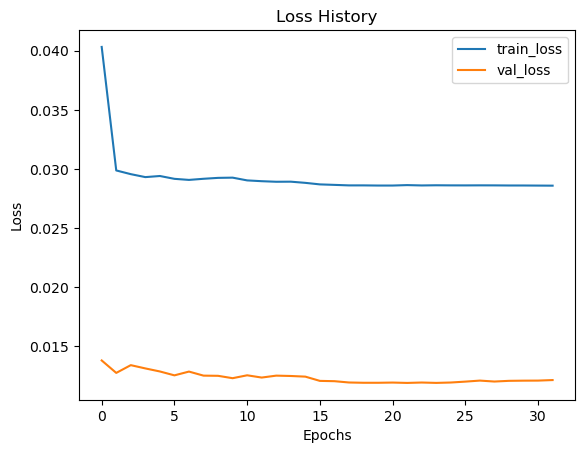

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

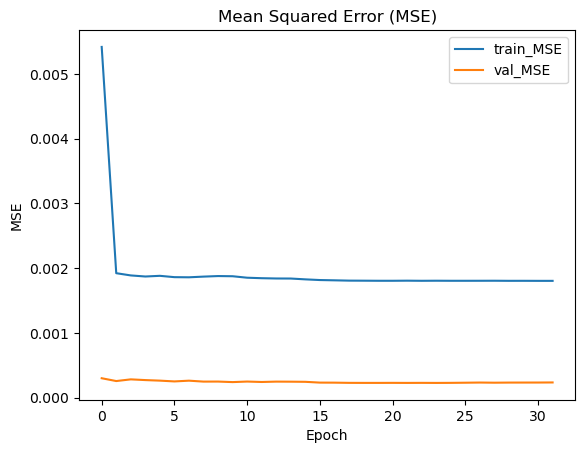

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

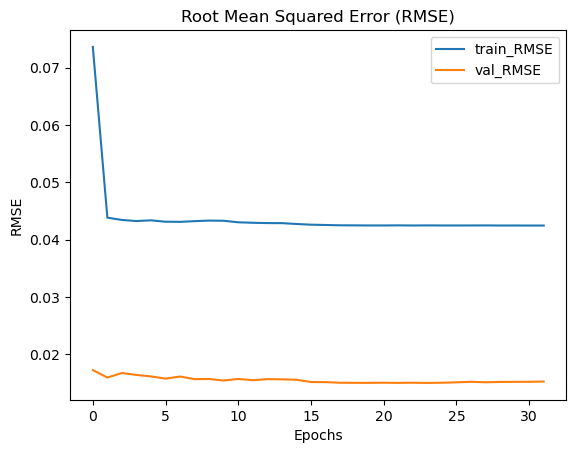

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

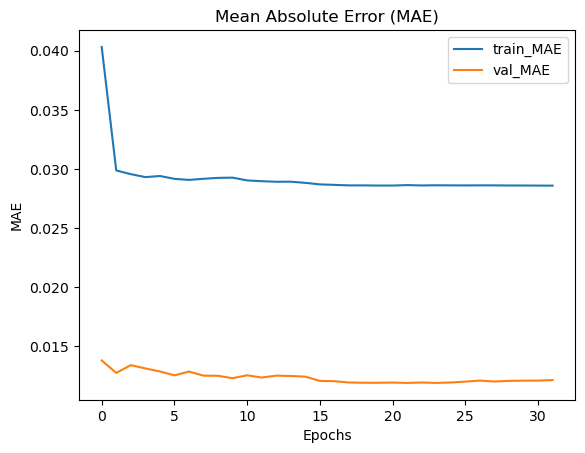

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

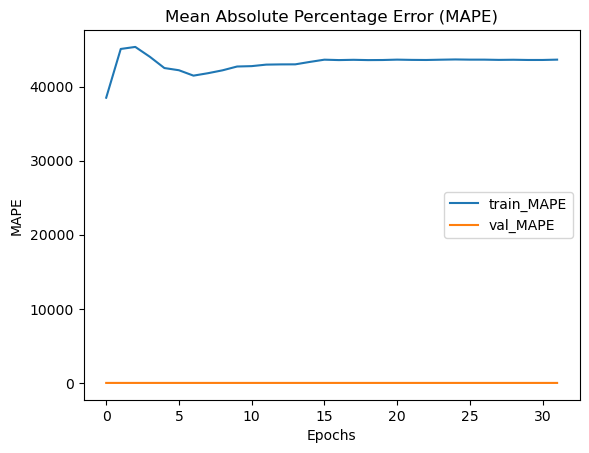

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:20:50.457214: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 4)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


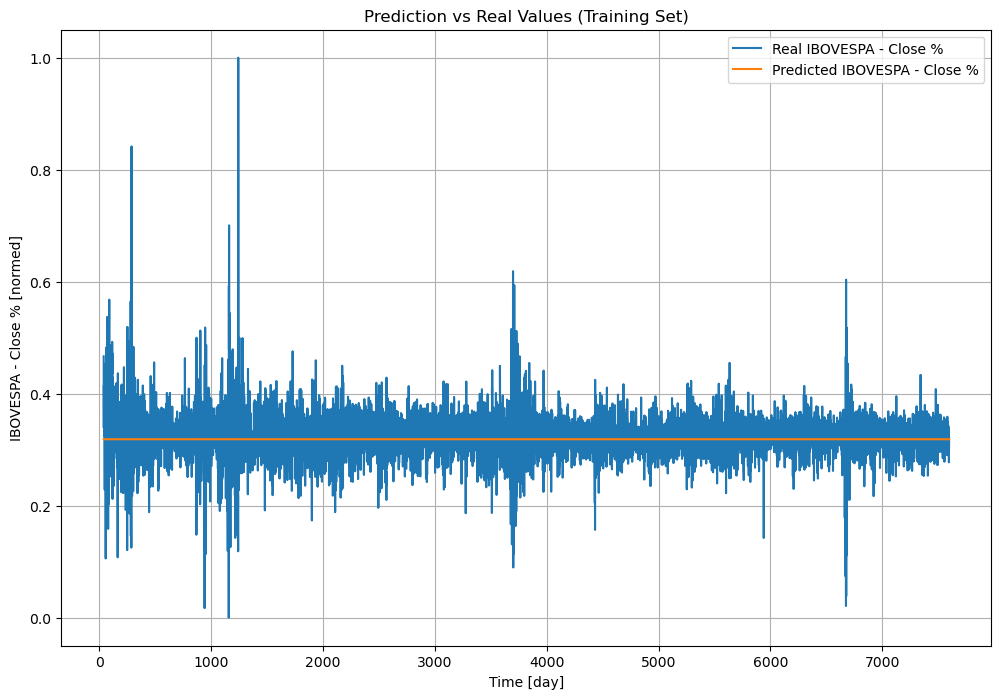

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


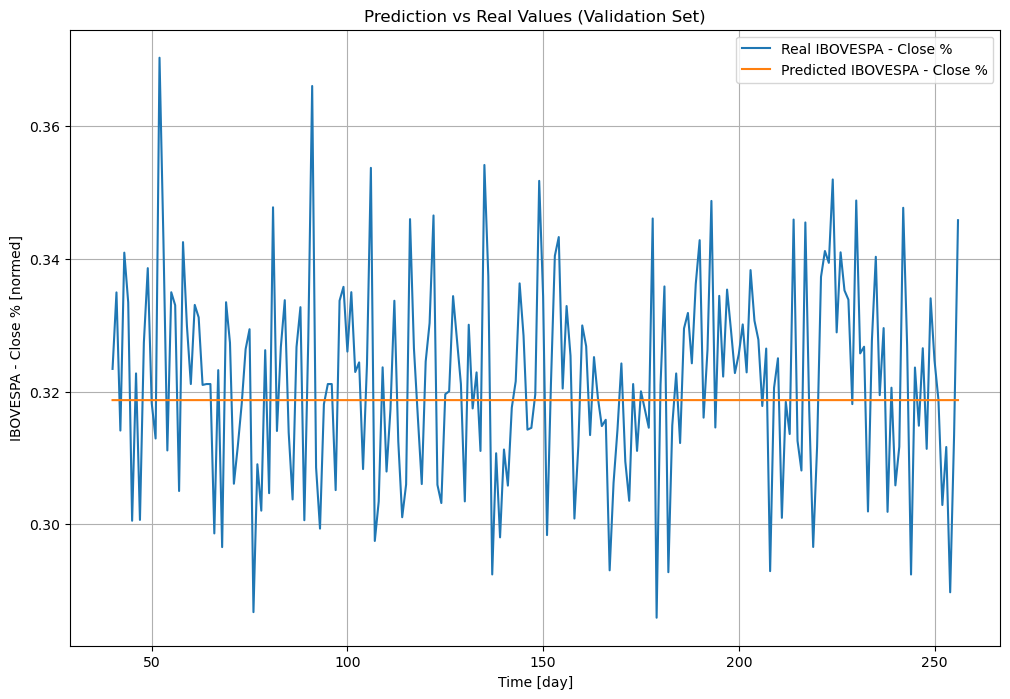

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


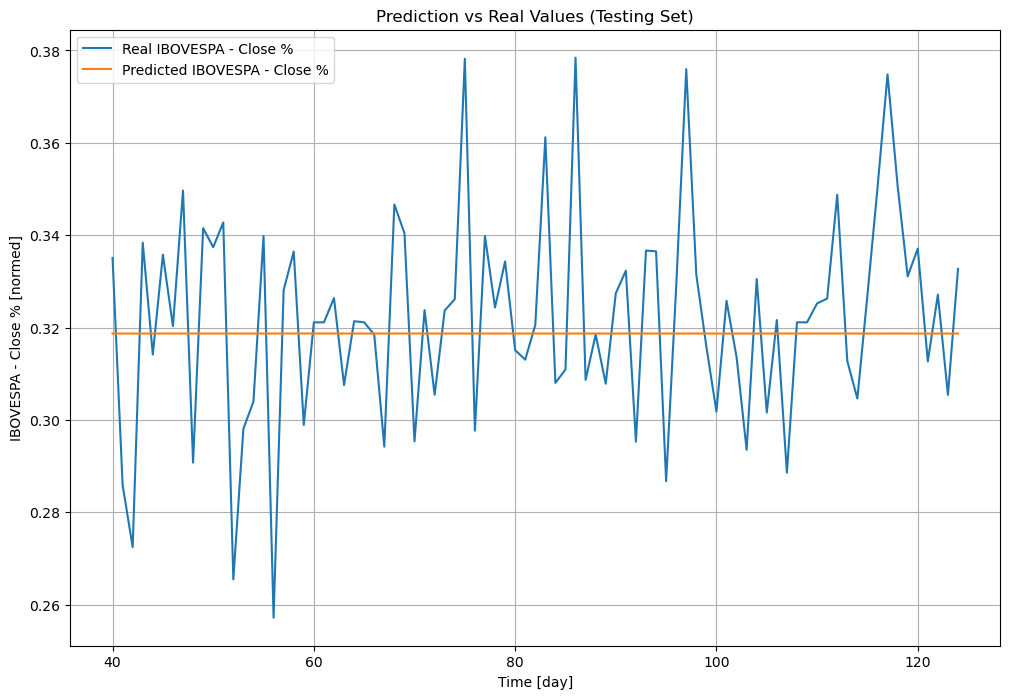

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

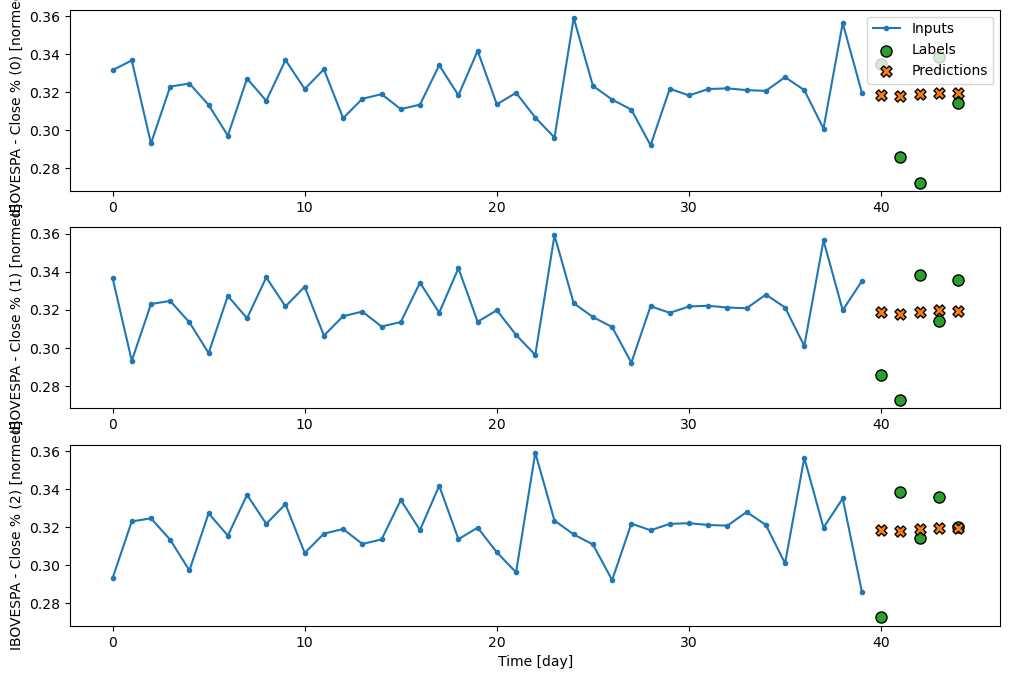

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:3s:600ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


array([[[0.3187159 , 0.3187159 , 0.3187159 , ..., 0.3187159 ,
         0.3187159 , 0.3187159 ],
        [0.31779706, 0.31779706, 0.31779706, ..., 0.31779706,
         0.31779706, 0.31779706],
        [0.31888825, 0.31888825, 0.31888825, ..., 0.31888825,
         0.31888825, 0.31888825],
        [0.3197644 , 0.3197644 , 0.3197644 , ..., 0.3197644 ,
         0.3197644 , 0.3197644 ],
        [0.31952307, 0.31952307, 0.31952307, ..., 0.31952307,
         0.31952307, 0.31952307]],

       [[0.31871435, 0.31871435, 0.31871435, ..., 0.31871435,
         0.31871435, 0.31871435],
        [0.31779626, 0.31779626, 0.31779626, ..., 0.31779626,
         0.31779626, 0.31779626],
        [0.31888786, 0.31888786, 0.31888786, ..., 0.31888786,
         0.31888786, 0.31888786],
        [0.3197653 , 0.3197653 , 0.3197653 , ..., 0.3197653 ,
         0.3197653 , 0.3197653 ],
        [0.31952506, 0.31952506, 0.31952506, ..., 0.31952506,
         0.31952506, 0.31952506]],

       [[0.3187114 , 0.3187114 , 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')